# Advanced Regression: Linear Regression

## Objectives:
* Explain what Machine Lerning Models (MLM) are used for.
* Use the steps you've learnt to train a model.
* Compare and Contrast the X and Y properties when training a model.
* Differentiate the predicted outputs versus previous/actual outputs.

# Table of Contents
1. What are Machine Learning Models.
2. Introduction to Scikit-Learn
3. Dataset: X and Y variables
4. Linear Reggression
6. Training a Model.
7. Line of Best Fit
8. Try it Yourself!
9. References

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## 1. What are Machine Learning Models

A machine learning model is a mathematical representation or algorithm that a machine learning system uses to make predictions, decisions, or classifications based on input data. These models are the core components of machine learning systems and are designed to learn patterns and relationships within data to perform specific tasks. 

![gif](https://i.gifer.com/origin/e7/e76511d36dbdc13fa0e24c39cce97c42_w200.webp)

---

## 2. Introduction to Scikit-Learn 

```python
pip install -U scikit-learn
```

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" width="250" height="600">

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.



* Below is the syntax for the LinearRegression model that will be used later: 

```python
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, df.Y)
```

In [2]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

---

## 3.Dataset: X and Y variables

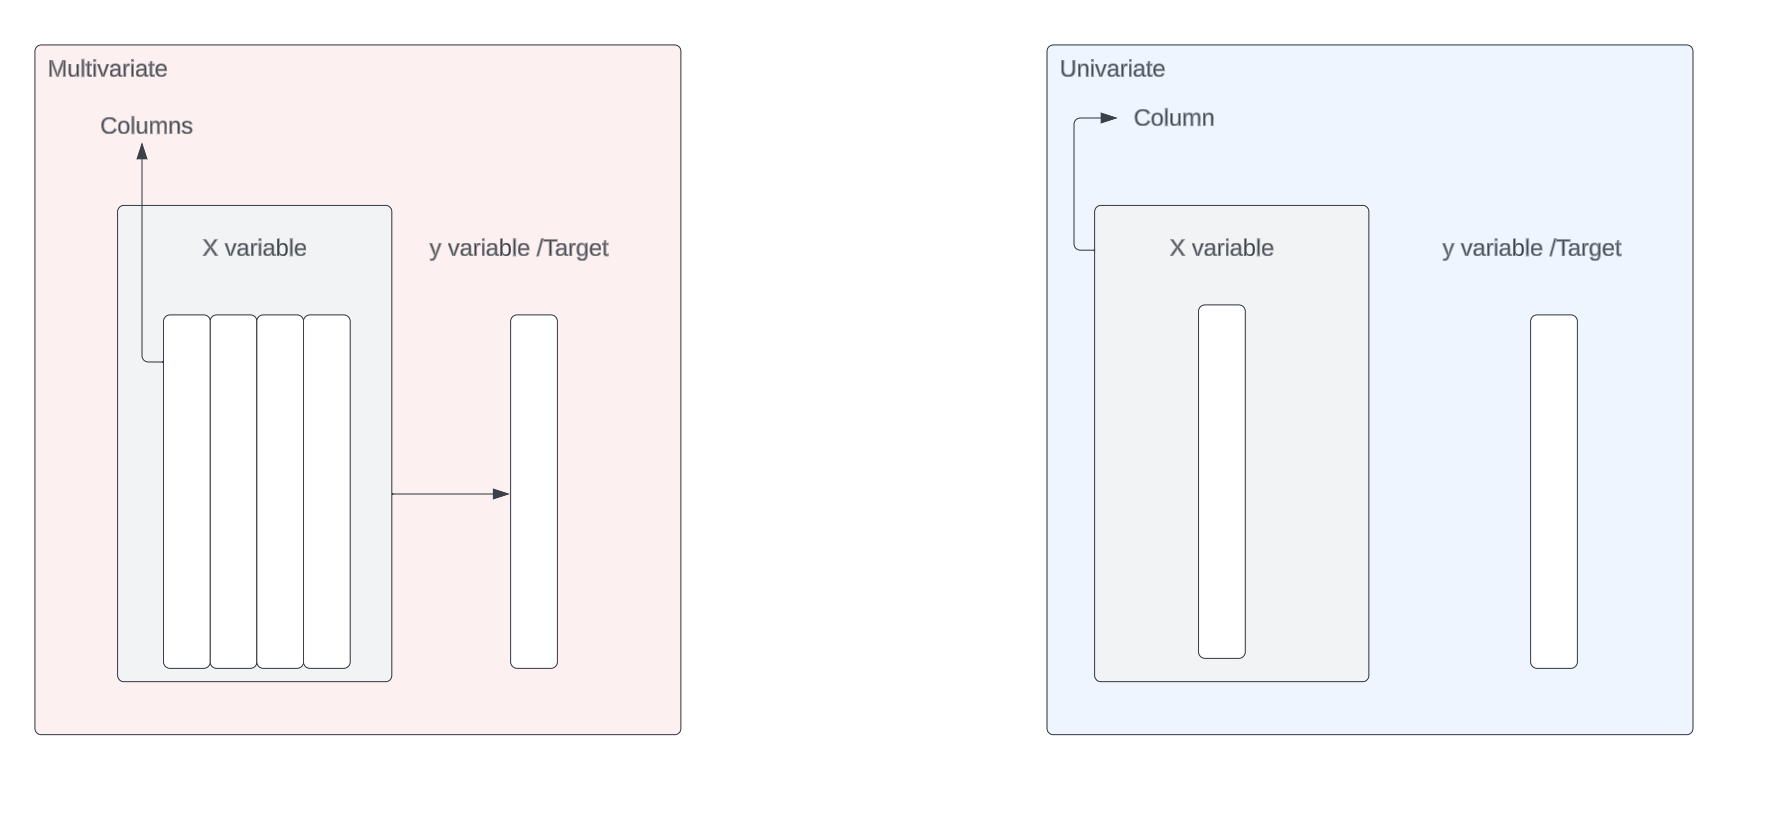

**Univariate Linear Regression**: A statistical analysis method that models the relationship between a single independent variable (predictor) and a continuous dependent variable, aiming to establish a linear equation to predict the dependent variable based on the single predictor.

**Multivariate Linear Regression**: Extends linear regression to consider multiple independent variables simultaneously, modeling their collective influence on a continuous dependent variable, making it suitable for scenarios with multiple predictors affecting the outcome.

In machine learning, X and Y variables are fundamental components used to represent and solve a wide range of predictive and modeling tasks. They are central to supervised learning, where the goal is to build a model that can make predictions or classifications based on input data.

![](https://d20khd7ddkh5ls.cloudfront.net/dependent_independent_variable_function.png)

* **X (Independent Variable / Features)**: “X” are the variables we will use to predict/classify our “Y” variable.
* **Y (Dependent Variable / Target)** : There can be many variables in our “X” set, but there will only be one variable in our “Y” set.

### In this example we will be using a Multiple Linear Regression!!

### Iris Dataset

The Iris dataset is a popular dataset in machine learning and is included in the **scikit-learn library**. This dataset consists of 150 samples of iris flowers, each from one of three species: Setosa, Versicolor, and Virginica. Each sample has four features (attributes): sepal length, sepal width, petal length, and petal width, all measured in centimeters. 
* However for the perpose of this webinar we will be focusing on the four features as our main dataset options.

![picture](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

In [3]:
# load the iris dataset
from sklearn import datasets
iris = datasets.load_iris()

### Below, we have a dataset, and our goal is to build a machine-learning model that can produce predictions of the **petal width**.

In [35]:
# Convert the iris dataset into a pandas dataframe
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# For the purpose of this notebook the iris dataset will be split into two seperate datasets.

<img src = attachment:53a10bd4-8d74-42b3-8ae2-d7d9df3ba3f9.png width = 650 hight = 650>
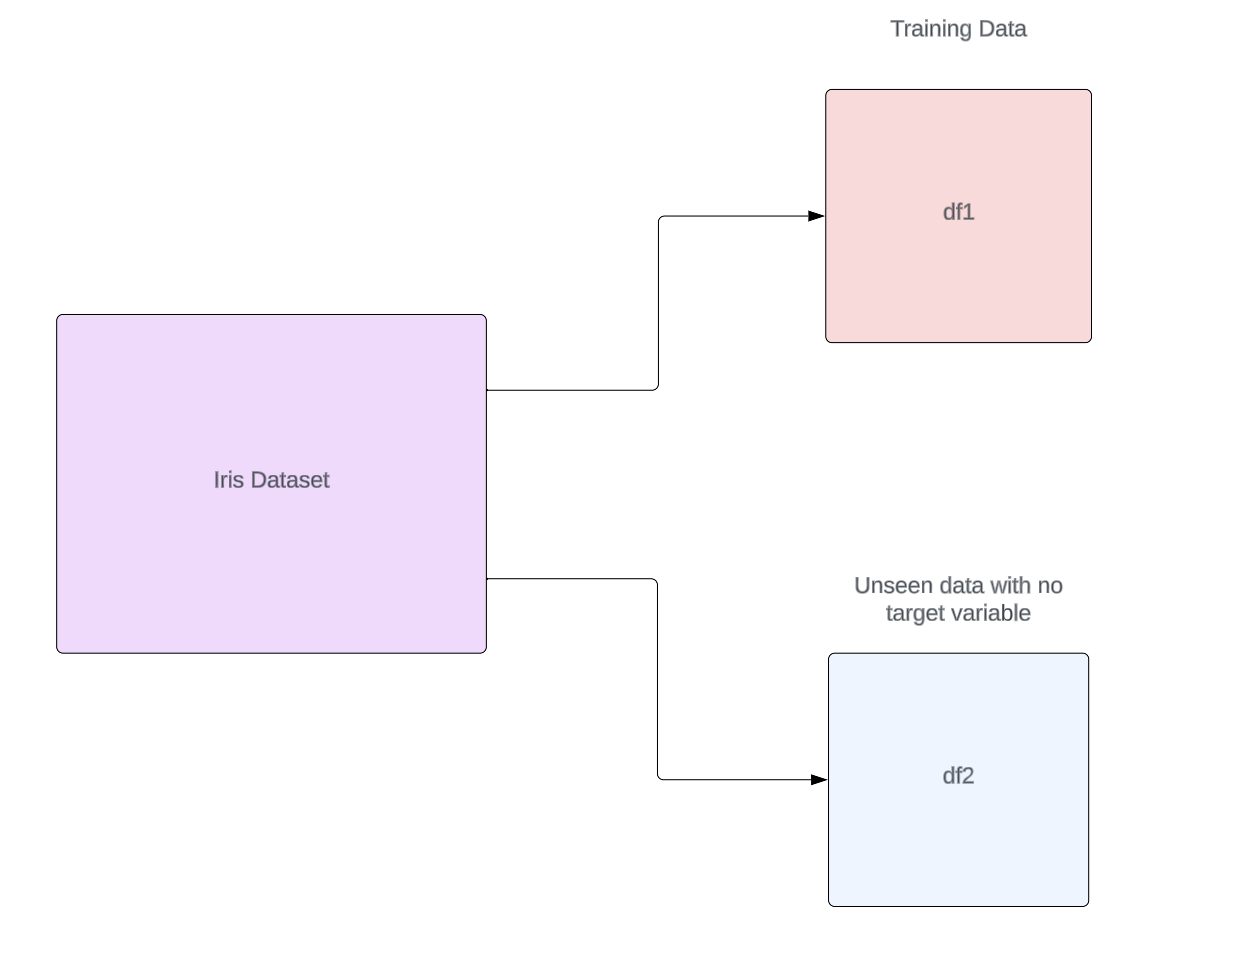

In [5]:
# Splitting the iris dataset into two tables names 'Training_data' and 'Unseen_data'
Training_data = iris_df.iloc[:81:]
Unseen_data = iris_df.iloc[81:]

In [7]:
# The petal width is avaiable, this is beacuase the first set will be used for training the model.
Training_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
77,6.7,3.0,5.0,1.7
78,6.0,2.9,4.5,1.5
79,5.7,2.6,3.5,1.0


### Removing the **"y"** variable (petal width) from the second dataset created.

Below we now are focusing on the second half or second dataset that was created from the original iris dataset.

In [8]:
# Quick look at our second dataset.
Unseen_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
82,5.8,2.7,3.9,1.2
83,6.0,2.7,5.1,1.6
84,5.4,3.0,4.5,1.5
85,6.0,3.4,4.5,1.6
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
#Removing the "petal width (cm)" column
Unseen_data = Unseen_data.drop('petal width (cm)', axis = 1)

In [10]:
#Lets look at our edited table
Unseen_data

,sepal length (cm),sepal width (cm),petal length (cm)
81,5.5,2.4,3.7
82,5.8,2.7,3.9
83,6.0,2.7,5.1
84,5.4,3.0,4.5
85,6.0,3.4,4.5
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


---

## Now we will split our Training Data!

We will need to split these two up, and we will use the code below to do that.

In [11]:
## Spliting into X and y variables for Training_data
X1 = Training_data.drop(['petal width (cm)'], axis=1)
y1 = Training_data['petal width (cm)']

X and y represent the columns from the Training_data dataset


```python
X1 = sepal length (cm), sepal width (cm), petal length (cm)

y1 = petal width (cm)
```

---

## 4. Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable (y1). The variable you are using to predict the other variable's value is called the independent variable (X1).

<img src = 'https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F62413fa0-3d80-411c-af93-ebd0f096a26a_1042x644.png' width=500>

We will now use this data to build our model!

---

## 5. Training a Model

In this section we will take a look at the steps needed to train a machine learning model. In this example we have already established that the model in focus is that of a linear Regression model `LinearRegression()`. The idea is for this model to produce estimated y variables trained on previous data that the model has been trained on. 

Training a machine learning model means **teaching the model to learn patterns, relationships**, or rules from a given dataset. During training, the model adjusts its internal parameters or weights to minimize the difference between its predictions and the actual target values in the training data

In [36]:
from sklearn.linear_model import LinearRegression

In [13]:
#Assign a variable to the model and is needed to instantiate the model!
model = LinearRegression()

In [14]:
# Now to train/fit with the X and y variables form your first dataset
model.fit(X1, y1)

LinearRegression()

In [15]:
# Predict y values on your Training data using .predict()
y1_predict = model.predict(X1)

## Before we look at the accuracy for the training data let us predict for the unseen data!

In [18]:
# Predict y values on your unseen data using .predict()
y2_predict = model.predict(Unseen_data)

In [46]:
#Add the new predicted target values to the table
Unseen_data['predicted petal width (cm)'] = y2_predict.tolist()

In [47]:
# rounded the values following original target values whole numbers format
Unseen_data = Unseen_data.round(1)

In [48]:
#Lets take a look at what the dataset looks like
Unseen_data

,sepal length (cm),sepal width (cm),petal length (cm),predicted petal length,predicted petal width (cm)
81,5.5,2.4,3.7,1.1,1.1
82,5.8,2.7,3.9,1.2,1.2
83,6.0,2.7,5.1,1.7,1.7
84,5.4,3.0,4.5,1.5,1.5
85,6.0,3.4,4.5,1.5,1.5
...,...,...,...,...,...
145,6.7,3.0,5.2,1.7,1.7
146,6.3,2.5,5.0,1.6,1.6
147,6.5,3.0,5.2,1.7,1.7
148,6.2,3.4,5.4,1.8,1.8


## However, how do you know how well your model is performing? ...

![gif](https://media3.giphy.com/media/lKXEBR8m1jWso/giphy.gif?cid=ecf05e47fdu0e1lg0siwiujwbyzf8yo2fa0jcj4eur2v2yfl&ep=v1_gifs_search&rid=giphy.gif&ct=g)

---

## 6.Line of Best Fit: RSS and MSE

### Understanding the Line of Best Fit
The line of best fit estimates a straight line that minimizes the distance between itself and where observations fall in some data set. The line of best fit is used to show a trend or correlation between the dependent variable and independent variable(s). It can be depicted visually, or as a mathematical expression.

### The Residual Sum of Squares (RSS)
The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, of a regression model. 
The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data.

We can measure the overall error of the fit by calculating the Residual Sum of Squares:

$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$ 

![picture](https://www.wallstreetmojo.com/wp-content/uploads/2022/05/Residual-sum-of-squares.jpg)

In [37]:
print("Residual sum of squares on training data:", ((y1_predict - y1) ** 2).sum())

Residual sum of squares on training data: 1.0635248409048648


In [38]:
print("Residual sum of squares on unseen data:", ((y2_predict - iris_df['petal width (cm)'].iloc[81:]) ** 2).sum())

Residual sum of squares on unseen data: 5.6517998477192855


### Mean Squared Error

What Is Mean Squared Error?

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function. 

**Mean Squared Error:**
$$MSE = \frac{RSS}{n}$$   
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [39]:
print("Mean Squared Error on training data:", (((y1_predict - y1) ** 2).sum())/len(X1))

Mean Squared Error on training data: 0.013129936307467466


In [40]:
print("Mean Squared Error on Unseen_data:", (((y2_predict - iris_df['petal width (cm)'].iloc[81:]) ** 2).sum())/len(iris_df['petal width (cm)'].iloc[81:]))

Mean Squared Error on Unseen_data: 0.08191014272056936


### However you can simply use Scikit-Learn for MSE

In [41]:
from sklearn import metrics

In [42]:
print('MSE on training data:', metrics.mean_squared_error(y1_predict, y1))

MSE on training data: 0.013129936307467466


In [43]:
print('MSE on unseen data:', metrics.mean_squared_error(y2_predict, iris_df['petal width (cm)'].iloc[81:]))

MSE on unseen data: 0.08191014272056936


---

## 7. Try it Yourself!

### Diabetes Dataset from Scikit-learn

<img src = https://res.cloudinary.com/practicaldev/image/fetch/s--V9CxdVAm--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/w8y1pf9mdhafhmimlk6s.jpeg width = 650 height = 650>

The diabetes dataset from scikit-learn is a widely used dataset for regression tasks. It contains ten baseline variables, including **age**, **sex**, **BMI**, **average blood pressure**, and **six blood serum measurements** for **442 diabetes patients**. 

### 1. Load in dataset

In [33]:
# load the diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [34]:
# Convert the iris dataset into a pandas dataframe
import pandas as pd
diabetes_df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


### 2. Split into training and unseen data

In [ ]:
# Splitting the diabetes dataset into two tables names 'Training_data' and 'Unseen_data'

### 3. Remove y variable from unseen data

In [ ]:
#Removing the "bp" from Unseen_data column (Make as target)

### 4. Split training data into X and y variables

In [ ]:
# Spliting into X and y variables for Training_data

### 5. Instantiate model

In [ ]:
#Training a Model
from sklearn.linear_model import LinearRegression

### 6. Train model using the .fit() method using your X and y variables from training data.

In [ ]:
#model.fit()

### 7. Predict y values on your training data using .predict()

In [ ]:
# Create predictions for the first dataset with a y value/target value
y1_predict = model.predict(...)

### 8. Predict y values on your unseen data using .predict()

In [ ]:
# Create predictions for the second dataset without a y value/target value
y2_predict = model.predict(...)

### 9. Assess your predictions with metrics (e.g. RSS and MSE)

In [ ]:
#print('MSE on training data:', metrics.mean_squared_error(...))

In [ ]:
#print('MSE on unseen data:', metrics.mean_squared_error(...))

In [ ]:
# from sklearn import metrics

---

## 8. References

**Machine Learning**: https://www.ibm.com/topics/machine-learning

**Scikit-Learn**: https://scikit-learn.org/stable/install.html

**Training a Model**: https://domino.ai/blog/what-is-machine-learning-model-training

**Linear Regression model from the  scikit-learn Library**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Objectives:
* Explain what Machine Lerning Models (MLM) are used for.
* Use the steps you've learnt to train a model.
* Compare and Contrast the X and Y properties when training a model.
* Differentiate the predicted outputs versus previous/actual outputs.